In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

%matplotlib inline
table  = pd.read_csv("D:\Lectures\England\DAV\Report\dataset\sensing\phonecharge\phonecharge_u01.csv")

In [3]:
table.head()

,start,end
0,1364359041,1364387080
1,1364531150,1364560331
2,1364622533,1364657458
3,1364703563,1364739262
4,1364746373,1364750694


In [4]:
for row in table.iterrows():
    table['start'] = table['start'].replace(row[1][0],datetime.fromtimestamp(row[1][0]))
    

In [5]:
for row in table.iterrows():
    table['end'] = table['end'].replace(row[1][1],datetime.fromtimestamp(row[1][1]))

In [6]:
table['Charge Duration']= table['end']- table['start']

In [7]:
table['Charge Duration'].describe()

count                           44
mean     0 days 06:17:24.977272727
std      0 days 02:58:27.917458675
min                0 days 01:07:10
25%         0 days 03:09:38.500000
50%                0 days 07:11:16
75%         0 days 08:23:18.500000
max                0 days 09:54:59
Name: Charge Duration, dtype: object

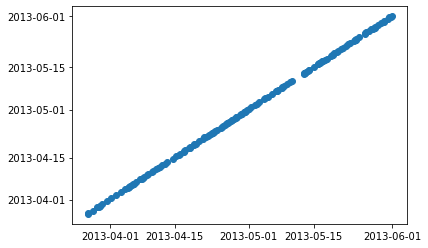

In [644]:
plt.scatter(table['start'],table['end'])
plt.show()


In [8]:
table.head()

,start,end,Charge Duration
0,2013-03-27 04:37:21,2013-03-27 12:24:40,0 days 07:47:19
1,2013-03-29 04:25:50,2013-03-29 12:32:11,0 days 08:06:21
2,2013-03-30 05:48:53,2013-03-30 15:30:58,0 days 09:42:05
3,2013-03-31 05:19:23,2013-03-31 15:14:22,0 days 09:54:59
4,2013-03-31 17:12:53,2013-03-31 18:24:54,0 days 01:12:01


In [646]:
table.set_index('start')

,end,Charge Duration
start,,
2013-03-27 04:40:36,2013-03-27 05:53:33,0 days 01:12:57
2013-03-27 06:21:15,2013-03-27 11:56:36,0 days 05:35:21
2013-03-28 05:53:22,2013-03-28 08:00:28,0 days 02:07:06
2013-03-29 05:54:51,2013-03-29 11:58:29,0 days 06:03:38
2013-03-29 15:22:36,2013-03-29 17:04:06,0 days 01:41:30
...,...,...
2013-05-30 05:47:00,2013-05-30 12:25:27,0 days 06:38:27
2013-05-31 01:37:30,2013-05-31 02:43:44,0 days 01:06:14
2013-05-31 08:19:43,2013-05-31 15:18:58,0 days 06:59:15


In [647]:
df=table
df=df.drop(['end'], 1)

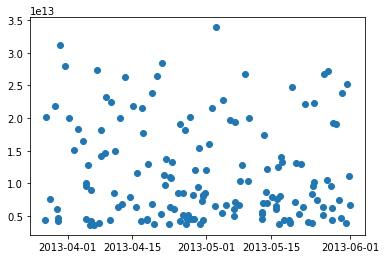

In [648]:
plt.plot_date(df['start'],df['Charge Duration'])

In [649]:
df.to_csv('user50_charge.csv')

In [9]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

%matplotlib inline
table  = pd.read_csv(r"C:\Users\muhad\DAV\charge_combined.csv")
table.head()

,index,start,Charge Duration,User
0,0.0,3/27/2013 20:36,0 days 04:53:57,1
1,1.0,3/28/2013 21:20,0 days 01:00:06,1
2,2.0,3/28/2013 23:44,0 days 02:03:12,1
3,3.0,3/29/2013 18:41,0 days 02:32:17,1
4,4.0,3/29/2013 22:05,0 days 03:42:18,1


In [24]:
table['Charge Duration'] = pd.to_timedelta(table['Charge Duration'])
#total_charge= table.groupby('User')['Charge Duration'].sum()
table['Charge Duration in Seconds'] = table['Charge Duration'].dt.total_seconds()

In [36]:
charge_time = table.groupby(by=["User"], dropna=False).sum()


In [40]:
charge_time['Charge Duration in Minutes'] = charge_time['Charge Duration in Seconds']/60

In [48]:
charge_time['User ID']= charge_time.index

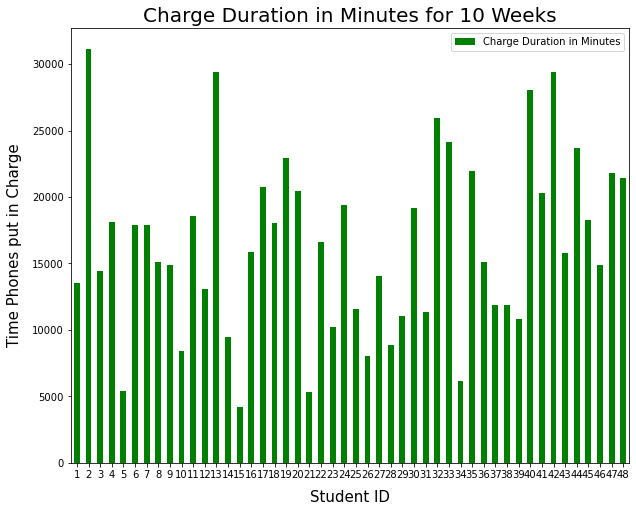

In [50]:
charge_time.plot(kind='bar', x='User ID', y='Charge Duration in Minutes', 
        figsize=(10, 8), legend=True, color='green', rot=0);
plt.title("Charge Duration in Minutes for 10 Weeks", fontsize=20)
plt.xlabel("Student ID", labelpad=10, fontsize=15)
plt.ylabel("Time Phones put in Charge", labelpad=10, fontsize=15)
plt.show()

In [51]:
charge_time['Charge Duration in Minutes'].mean()

16385.005208333332